<h1> Objective </h1>
<p>In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y).</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


<h1>Section I : Data Loading</h1>
<ul>
<li>Part I : Load the dataset into the notebook</li>
<li>Part II : Explore and make note of Attribute Information from UCI</li>
<li>Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?</li>
<li>Part IV : What is the ratio of the two classes ? Are they balanced ?</li>
</ul>


In [2]:
#Load Data
file = "data/bankingsys.csv"
data = pd.read_csv(file)
data.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


<h1> What is Y? </h1>
<p> prob the client will subscribe a term deposit (variable y).</p>

y is either 0 or 1

In [3]:
data.shape

(41188, 21)

In [4]:
data.y.unique()

array([0, 1])

<h1>Section II : Data Cleaning</h1>
<p>Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances<p>

<ul>
<li>Part I : Get the dtypes of all the columns of our dataset</li>
<li>Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors</li>
<li>Part III : Make note of the deviation in the dataset compared to the description provided by UCI</li>
<li>Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data </li>
<li>Part V : Print the cleaned data</li>
</ul>


In [5]:
data.info()
obj = ['age','job','marital','education','default','housing','loan','contact']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
obj = ['age','job','marital','education','default','housing','loan','contact']


In [7]:
for i in obj:
    print(f"{i} has {data[i].nunique()} unique values")

age has 159 unique values
job has 21 unique values
marital has 7 unique values
education has 11 unique values
default has 3 unique values
housing has 3 unique values
loan has 3 unique values
contact has 2 unique values


In [8]:
for i in obj:
    print(i,data[i].unique(), '\n')

age ['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' '35-30' '25' '57' '63' '58' '60' '30-35'
 '64' '51' '23' '20' '74' '80' '61' '25-30' '62' '75' '21' '82' '77'
 '18-25' '30-32' '70' '50-55' '76' '73' '66' '22' '71' '19' '79' '88' '65'
 '67' '81' '18' '84' '69' '98' '85' '83' '78' '92' '45-50' '20-25' '20-40'
 '35-40' '86' '94' '17' '91' '89' '87' '95' '30-40' 56 39 30 53 37 22 45
 31 24 50 58 33 27 28 32 51 41 49 43 44 35 29 26 57 25 42 48 46 67 38 34
 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88 18 68 71 73 80 79
 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82] 

job ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student' 'MANAGEMENT' 'RETIRED' 'STUDENT' 'ADMIN.' 'TECHNICIAN'
 'BLUE-COLLAR' 'HOUSEMAID' 'SERVICES' 'UNKNOWN'] 

marital ['married' 'single' 'divorce

<h1>TODO</h1>
<ul>
<li>Drop contact because it is unnecessary </li>

<li>Format age so that it resembles different types of ages(str,int)
handle objects in the df</li>
<li> </li>
</ul>


In [9]:
df = data.drop("contact", axis=1)
df.shape

(41188, 20)

Make THE AGE A FLOAT for range

In [10]:
def convert_age():
    for i,row in enumerate(df.loc[:,'age']):
        if type(row) is int or type(row) is float:
            continue
        elif '-' in row:
            a = str(row).split('-')
            # print(a)
            avg_age = (int(a[0]) + int(a[1])) /2
            # print(avg_age)
            
            #print(df.iloc[i,0])
            df.iloc[i,0] = avg_age

    return df.age.astype('float')

In [11]:
df['age'] = convert_age()

In [12]:
df.shape

(41188, 20)

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.023623,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.421418,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [15]:
df.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000882,0.004596,-0.032927,0.024377,-0.000399,0.000840,0.129343,0.010743,-0.017749,0.030413
duration,-0.000882,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004596,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.032927,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609
previous,0.024377,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000399,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000840,0.005312,0.127836,0.070331,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129343,-0.008173,-0.013733,-0.082578,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010743,-0.032897,0.135133,0.263918,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017749,-0.044703,0.144095,0.331380,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

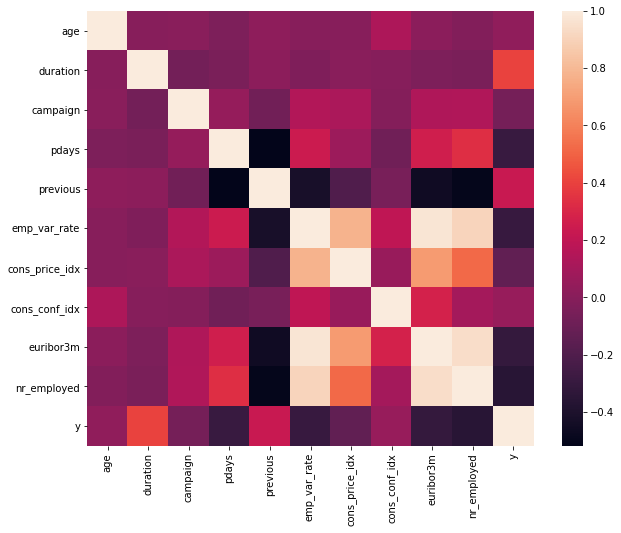

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [17]:
print(36548-4640)
df['y'].value_counts()

31908


0    36548
1     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

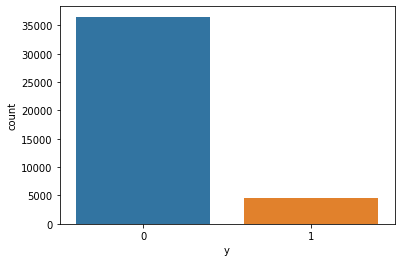

In [18]:
sns.countplot(x=df['y'])

<h1>Observation</h1>
There are <i>31908</i> more 0's than 1's in the database

In [19]:
catagory_cols = ['job','marital','education','default','housing','loan','month','day_of_week','poutcome']


<AxesSubplot:xlabel='y', ylabel='count'>

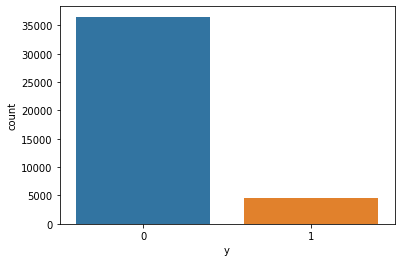

In [20]:
sns.countplot(x=df.y,data=df)

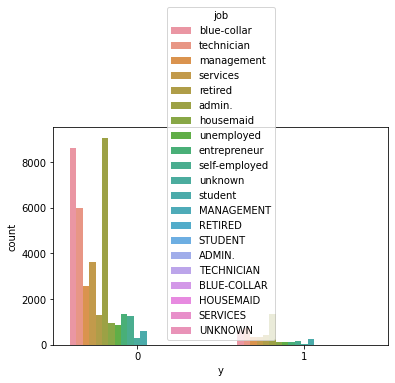

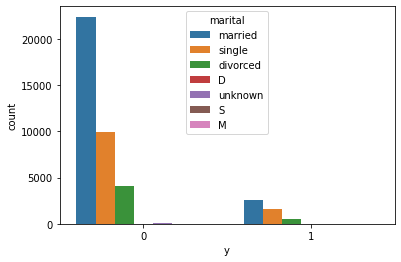

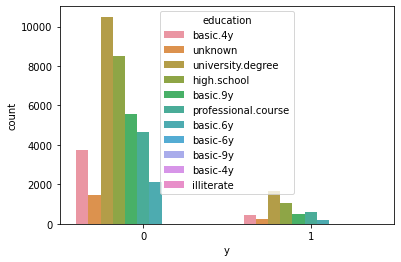

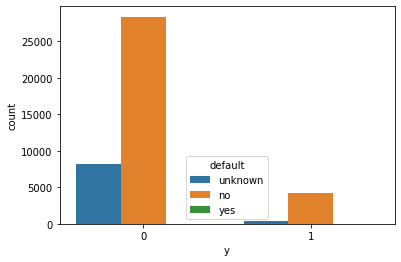

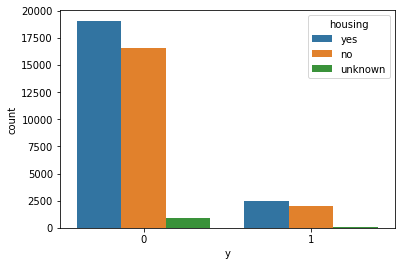

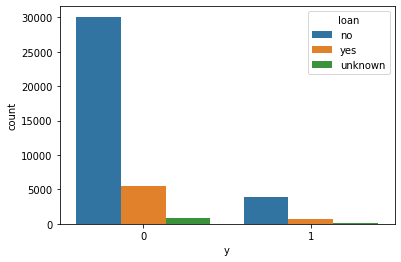

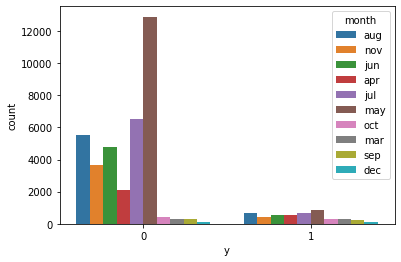

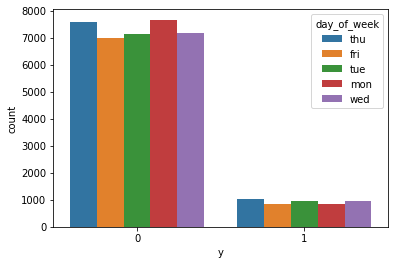

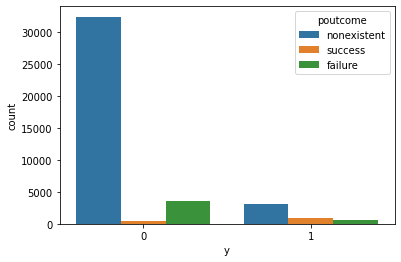

In [21]:
for i in catagory_cols:
    sns.countplot(x=df.y,data=df,hue=i)
    plt.show()

<b>Poutcome is the only feature above that showed a different outcome pattern from 0 and 1</b>
<ul>
<li>in the graph it shows both sides the majority of both outcomes are 'nonexistent' </li>
<li>however There are more 'failure's than 'success' that comes out 0 rather than 1</li>
</ul>

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


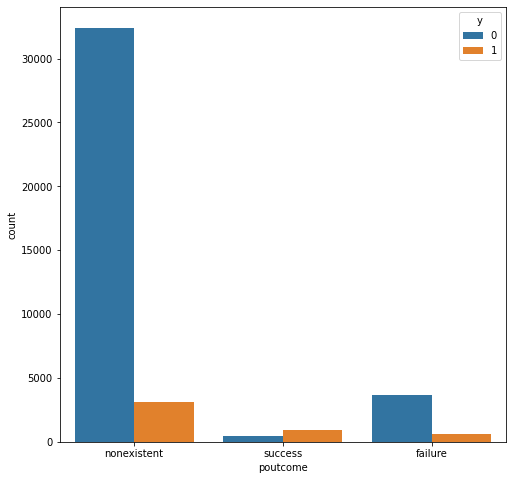

In [22]:
plt.figure(figsize=(8,8))
print(df['poutcome'].value_counts())
sns.countplot(data=df,x='poutcome',hue='y')
plt.show()

In [23]:
df['age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        44.0
1        53.0
2        28.0
3        39.0
4        55.0
         ... 
41183    59.0
41184    31.0
41185    42.0
41186    48.0
41187    25.0
Name: age, Length: 41188, dtype: float64>

In [24]:
type(df['age'][0])

numpy.float64

<AxesSubplot:xlabel='age', ylabel='Count'>

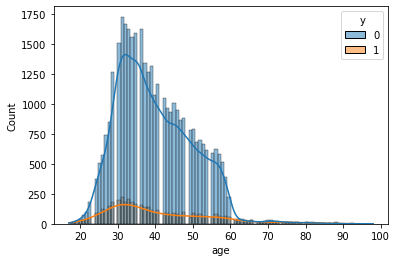

In [25]:
sns.histplot(data=df, x=df['age'], kde=True, hue='y')

We know if duration == 0 the anwser will be No so we can find values where durations are not 0 or even try to find a min value for a 1(yes)

In [26]:
print(df.shape)
dur_shape = df[df['duration']>0].shape
#Theres 4 rows with 0 duration
#******remove them later

print(f"There are {df.shape[0] - dur_shape[0]} entries with '0' duration" )

(41188, 20)
There are 4 entries with '0' duration


<b>Section III : Exploring data with Group by¶</b>
In this section , we must create some primitive EDA

Use the groupby function on the mean of the following columns :
<ol>
<li>I : y</li>
<li>II : job</li>
<li>III : marital</li>
<li>IV : education</li>
</ol>

Make a note of what you learn from the outputs !

In [27]:
df.groupby('y').sum()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,1458656.0,8071436,96234,36012394.0,4838,9095.9,3421030.113,-1483596.5,139302.379,1.891785e+08
1,189837.0,2566807,9520,3675045.0,2286,-5723.2,433164.351,-184624.6,9851.347,2.364134e+07


In [28]:
df.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN.,35.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,36.000000,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,36.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,37.333333,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,24.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,52.000000,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


<AxesSubplot:xlabel='age', ylabel='job'>

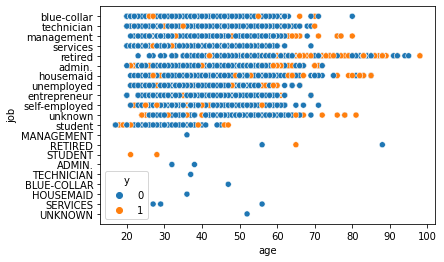

In [29]:
sns.scatterplot(data=df,x='age',y='job',hue='y' )

In [30]:
df.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,39.000000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.904188,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.307006,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,33.159187,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


<AxesSubplot:xlabel='age', ylabel='marital'>

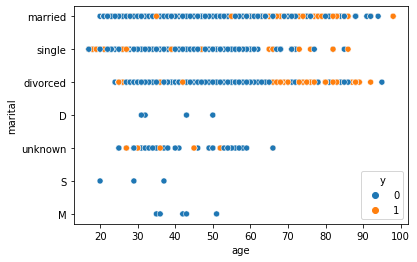

In [31]:
sns.scatterplot(data=df,x='age',y='marital',hue='y' )

In [32]:
df.groupby('education').sum()
''

''

In [33]:
df['age'] = pd.cut(df['age'],5, labels=False)

In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.897106,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,0.746955,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,1.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4.000000,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Drop non-digital numbers(maybe convert obj to int)

In [35]:
# df_test = df.drop(catagory_cols,axis=1)
df2 = df.copy()

print(catagory_cols)
#final_df = pd.get_dummies(df)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


In [36]:
X = df2.drop("y",1)

y = df2['y']

In [37]:
for c in catagory_cols:
    X.drop(c,axis=1,inplace=True)

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25, random_state=26)
display(train_x)
display(train_y)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
39285,1,416,8,999.0,0,1.4,93.918,-42.7,4.960,5228.1
8840,2,133,1,3.0,1,-3.4,92.431,-26.9,0.733,5017.5
23837,1,200,2,4.0,1,-0.1,93.200,-42.0,4.191,5195.8
37440,0,48,2,999.0,0,-1.8,93.075,-47.1,1.479,5099.1
36529,0,135,3,999.0,0,1.4,94.465,-41.8,4.864,5228.1
...,...,...,...,...,...,...,...,...,...,...
10202,1,326,3,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
23629,1,254,16,999.0,0,1.1,93.994,-36.4,4.859,5191.0
24275,0,422,5,999.0,0,1.4,94.465,-41.8,4.967,5228.1
10177,0,281,2,999.0,0,1.4,93.444,-36.1,4.967,5228.1


39285    0
8840     1
23837    0
37440    0
36529    0
        ..
10202    0
23629    0
24275    0
10177    0
30014    0
Name: y, Length: 30891, dtype: int64

In [39]:
classifier=LogisticRegression(random_state=26)
classifier.fit(train_x,train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=26)

In [40]:
class_score = classifier.score(test_x,test_y)
print("Test accuracy:", round(classifier.score(test_x,test_y),4))
print("Train accuracy:", round(classifier.score(train_x,train_y),4))

Test accuracy: 0.9082
Train accuracy: 0.9097


In [41]:
y_pred = classifier.predict(test_x)


In [42]:

from sklearn import metrics
#Section IV : Categorical Variable Encoding¶
#Part I : Create dummy variables for your categorial variables
#part II : Explore your new dataset with these new dummy variables !from sklearn import metrics
print(metrics.confusion_matrix(test_y, y_pred, labels=[0, 1]))
print(metrics.classification_report(test_y, y_pred, labels=[0, 1]))


[[8870  224]
 [ 721  482]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9094
           1       0.68      0.40      0.50      1203

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



<AxesSubplot:>

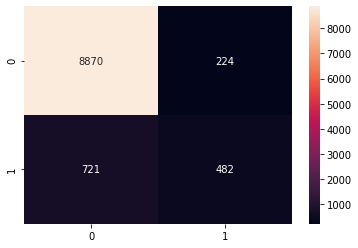

In [43]:

cm = metrics.confusion_matrix(test_y, y_pred, labels=[0, 1])
sns.heatmap(cm,annot=True, fmt='d')

<h1>Section IV : Categorical Variable Encoding¶</h1>
Part I : Create dummy variables for your categorial variables


part II : Explore your new dataset with these new dummy variables !

In [44]:
df_dummies = df.copy()

In [45]:
df_dummies = pd.get_dummies(df_dummies,drop_first=True)
df_dummies

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,2,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,0,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,1,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,2,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,1,0,0,1,0
41184,0,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,0
41185,1,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,0,1,1,0
41186,1,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,1,0,0,0,1,0,1,0



<h1>Section V : Preliminary Training</h1>
Part I : Import your Logisitc Regression libraries


Part II : Split your train and test dataset and train on the data


Part III : Make note of the classification report and other metrics

In [46]:
dX = df_dummies.drop("y",1)
dy = df_dummies['y']

In [47]:
dtrain_x,dtest_x,dtrain_y,dtest_y = train_test_split(dX,dy,test_size=0.25)

In [48]:
display(dtrain_x)
display(dtrain_y)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
40777,0,101,2,999.0,0,1.4,94.465,-41.8,4.967,5228.1,...,0,0,0,0,0,0,0,0,1,0
37773,0,145,4,999.0,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
33515,2,136,1,999.0,0,-2.9,92.963,-40.8,1.260,5076.2,...,0,0,0,0,0,0,0,1,1,0
26666,0,131,12,999.0,0,-1.8,92.843,-50.0,1.811,5099.1,...,0,0,0,0,1,0,0,0,1,0
27443,1,177,1,999.0,1,-1.8,92.893,-46.2,1.334,5099.1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,1,177,4,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
12230,0,253,1,9.0,2,-1.1,94.601,-49.5,1.032,4963.6,...,0,0,1,0,1,0,0,0,0,1
21676,1,44,1,999.0,1,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,0,0
5479,1,132,2,999.0,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


40777    0
37773    0
33515    0
26666    0
27443    0
        ..
1866     0
12230    1
21676    0
5479     0
15267    0
Name: y, Length: 30891, dtype: int64

In [49]:
log = LogisticRegression()
log.fit(dtrain_x,dtrain_y)
d_pred = log.predict(dtest_x)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
log_acc = log.score(dtest_x,dtest_y)
print("Accuracy: ", log_acc )

Accuracy:  0.9124987860541905


In [51]:
print(metrics.classification_report(dtest_y, d_pred, labels=[0, 1]))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9161
           1       0.67      0.41      0.51      1136

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



<AxesSubplot:>

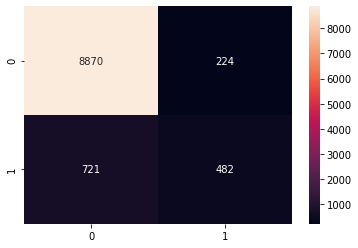

In [52]:

cm = metrics.confusion_matrix(test_y, y_pred, labels=[0, 1])
sns.heatmap(cm,annot=True, fmt='d')

In [53]:
print("Accuracy w/ dummies vs Accuracy without")
print(f"{round(log_acc,4)} / {round(class_score,4)}")

Accuracy w/ dummies vs Accuracy without
0.9125 / 0.9082


In [54]:
abs(log_acc - class_score)

0.004273089249295925

<h1>Observation</h1>

<p> When we add catagorical dummies to the DataFrame the logression is 0.9 more accurate </P>

<h1>Section VI : Let's Improve the performance !¶</h1>

<ul>
<li>Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation</li>

<li>Part I : Make note of the performance from the last training
<li>Part II : Try implementing SMOTE to balance the two class labels</li>


<li>Part III : Make note of the y label data now , what are the rations now ?</li>

In [55]:
df_smote = df_dummies.copy()


In [56]:
df_smote.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,2,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,0,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,1,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,2,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_smote['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

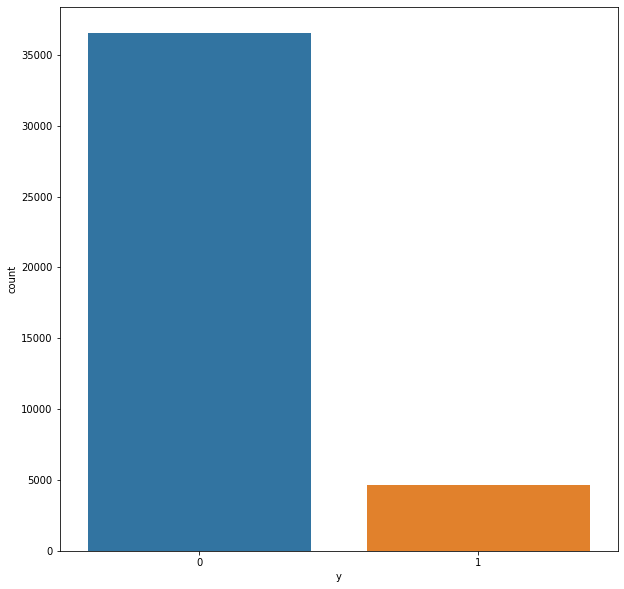

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='y')
plt.show()


In [59]:
sx = df_smote.drop('y',1)
sy = df_smote['y']

In [60]:
train_sx, test_sx, train_sy,test_sy = train_test_split(sx,sy,test_size=0.25,random_state=126)

In [61]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0)
train_sx, train_sy = smt.fit_resample(train_sx, train_sy)

(54790, 67) (41188, 20)
54790
54790


<AxesSubplot:xlabel='y', ylabel='count'>

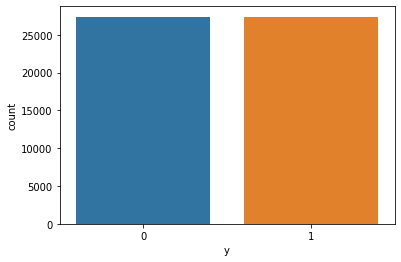

In [62]:
print(train_sx.shape,df.shape)
print(len(train_sy[:] == 0))
print(len(train_sy[:] == 1))

sns.countplot(x=train_sy)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
log.fit(train_sx, train_sy)
smote_pred = log.predict(test_sx)
smote_acc = log.score(train_sx,train_sy)
print("Training data score", round(smote_acc,4))
#print("Accuracy with testing data:", accuracy_score(train_sy,smote_pred))

Training data score 0.922


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print("smote/ Accuracy w/ dummies vs Accuracy without")
print(f"{round(smote_acc,4)} / {round(log_acc,4)} / {round(class_score,4)} ")

smote/ Accuracy w/ dummies vs Accuracy without
0.922 / 0.9125 / 0.9082 


In [66]:
#sns.pairplot(data=df_smote,hue='y')

<h1>Section VII : Let us Re-Train!</h1>


Part I : Explore what RFE means


Part II : Implement your training process inside the RFE


Part III : What are the best columns that your RFE found? Please make a list of it

<h1> Observation </h1>

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [68]:
df_rfe = df_smote.copy()

In [69]:
corr_feat = set()
corr_mat = df_dummies.drop('y', axis=1).corr()
for i in range(len(corr_mat.columns)):
      for j in range(i):
            if abs(corr_mat.iloc[i,j]) > 0.80:
                colname = corr_mat.columns[i]
                corr_feat.add(colname)

corr_feat

{'euribor3m',
 'loan_unknown',
 'nr_employed',
 'poutcome_nonexistent',
 'poutcome_success'}

In [70]:
df_rfe.drop(corr_feat, axis=1)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,job_BLUE-COLLAR,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,210,1,999.0,0,1.4,93.444,-36.1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,138,1,999.0,0,-0.1,93.200,-42.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,339,3,6.0,2,-1.7,94.055,-39.8,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,185,2,999.0,0,-1.8,93.075,-47.1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,137,1,3.0,1,-2.9,92.201,-31.4,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,222,1,999.0,0,1.4,94.465,-41.8,0,0,...,1,0,0,0,0,0,0,1,0,0
41184,0,196,2,999.0,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,0
41185,1,62,3,999.0,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,0,0,1
41186,1,200,2,999.0,0,-3.4,92.431,-26.9,0,0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
rfe_x = df_rfe.drop('y',axis=1)
rfe_y = df_rfe['y']

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(max_depth = 1,random_state=26)
rfecv = RFECV(estimator=rfc,step=1,cv=StratifiedKFold(10),scoring='accuracy')
rfecv.fit(rfe_x,rfe_y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(max_depth=1, random_state=26),
      scoring='accuracy')

In [73]:
print("optimum features are ", rfecv.n_features_)

optimum features are  7


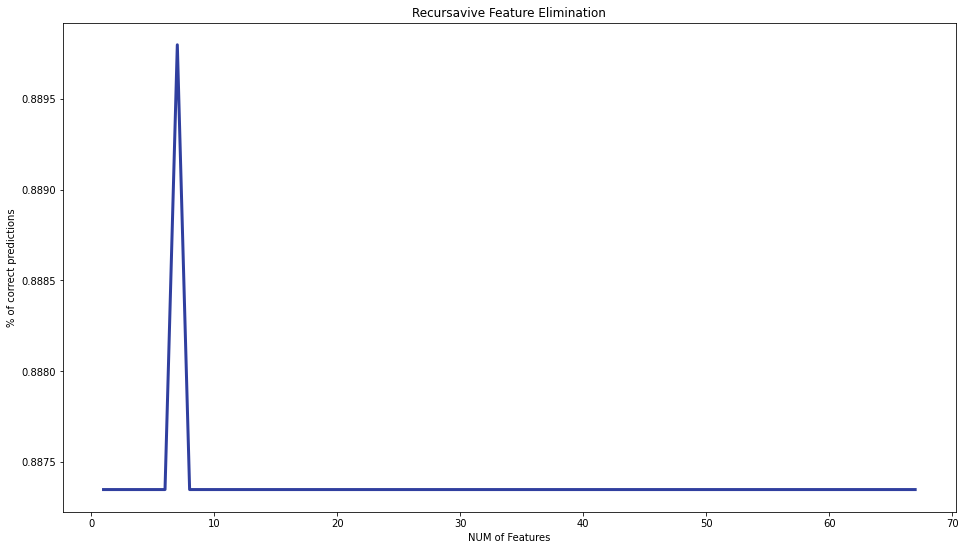

In [74]:
plt.figure(figsize=(16,9))
plt.title("Recursavive Feature Elimination")
plt.xlabel("NUM of Features")
plt.ylabel("% of correct predictions")
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_,color="#303f9f",linewidth=3)
plt.show()

In [75]:
print(np.where(rfecv.support_== False)[0])
rfe_x.drop(rfe_x.columns[np.where(rfecv.support_== False)[0]],axis=1,inplace=True)

[ 0  2  4  6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65]


In [76]:
rfecv.estimator_.feature_importances_

array([0.18, 0.19, 0.03, 0.  , 0.18, 0.27, 0.15])

In [77]:
dset = pd.DataFrame()
dset['attr'] = rfe_x.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

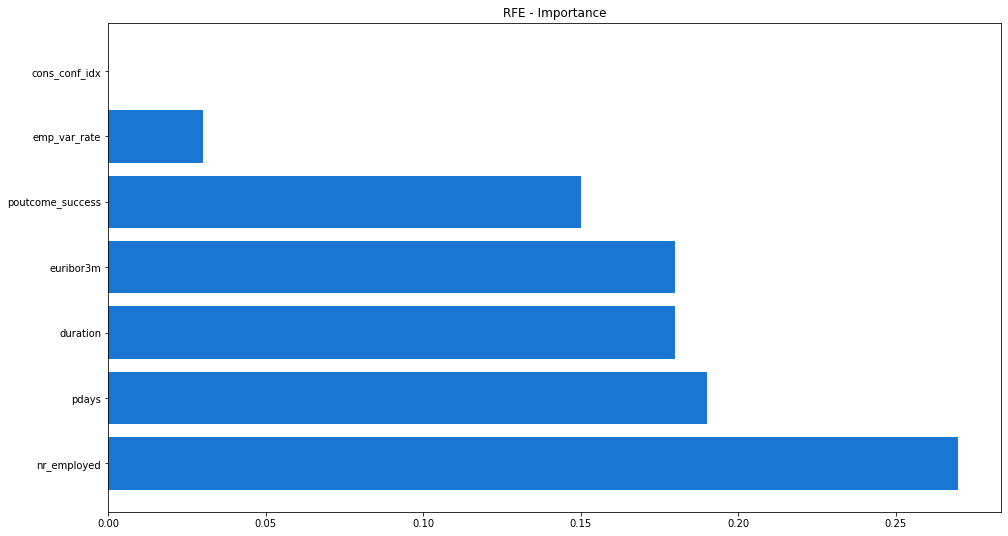

In [78]:
plt.figure(figsize=(16,9))
plt.barh(y=dset['attr'], width=dset['importance'], color="#1976D2")
plt.title("RFE - Importance")
plt.show()

In [79]:
rfe_x.columns

Index(['duration', 'pdays', 'emp_var_rate', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'poutcome_success'],
      dtype='object')

In [80]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

<h1>Section VIII : Training time !
Now that you have found the best columns for this problem</h1>

Part I : Now train the model with the new data you have created after the RFE


Part II : Create the prediction system to get the metrics such as accuracy

In [81]:
df_value_features = df_dummies[rfe_x.columns]
df_value_features['y'] = df_dummies['y']
df_value_features

,duration,pdays,emp_var_rate,cons_conf_idx,euribor3m,nr_employed,poutcome_success,y
0,210,999.0,1.4,-36.1,4.963,5228.1,0,0
1,138,999.0,-0.1,-42.0,4.021,5195.8,0,0
2,339,6.0,-1.7,-39.8,0.729,4991.6,1,1
3,185,999.0,-1.8,-47.1,1.405,5099.1,0,0
4,137,3.0,-2.9,-31.4,0.869,5076.2,1,1
...,...,...,...,...,...,...,...,...
41183,222,999.0,1.4,-41.8,4.866,5228.1,0,0
41184,196,999.0,1.1,-36.4,4.860,5191.0,0,0
41185,62,999.0,1.1,-36.4,4.857,5191.0,0,0
41186,200,999.0,-3.4,-26.9,0.742,5017.5,0,0


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

def observe(data, graph=False):
    print(data.head())
    X = data.drop('y', axis=1)
    y = data['y']
    
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    pred_y = log.predict(x_test)
    #plt.figure(figsize=(16,9))
    accuracy = accuracy_score(pred_y,test_y)
    print('The accuracy {}%'.format(round(accuracy)*100,2))
    print(metrics.confusion_matrix(y_test, pred_y, labels=[0, 1]))
    print(metrics.classification_report(y_test, pred_y, labels=[0, 1]))
    cm = metrics.confusion_matrix(y_test, pred_y, labels=[0, 1])
    sns.heatmap(cm,annot=True)
    if graph:
        for i in X:
            plt.scatter(y=y,x=X[i])
            plt.title(f'{i} vs "y"')
            plt.show()
        
    return accuracy
  

   duration  pdays  emp_var_rate  cons_conf_idx  euribor3m  nr_employed  \
0       210  999.0           1.4          -36.1      4.963       5228.1   
1       138  999.0          -0.1          -42.0      4.021       5195.8   
2       339    6.0          -1.7          -39.8      0.729       4991.6   
3       185  999.0          -1.8          -47.1      1.405       5099.1   
4       137    3.0          -2.9          -31.4      0.869       5076.2   

   poutcome_success  y  
0                 0  0  
1                 0  0  
2                 1  1  
3                 0  0  
4                 1  1  
The accuracy 100%
[[8887  231]
 [ 723  456]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9118
           1       0.66      0.39      0.49      1179

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.72     10297
weighted avg       0.89      0.91      0.90     10297



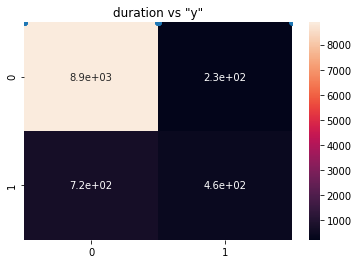

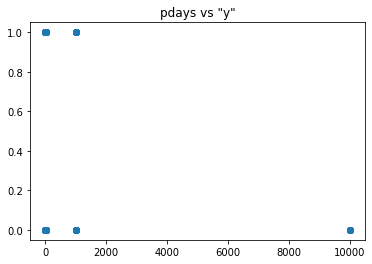

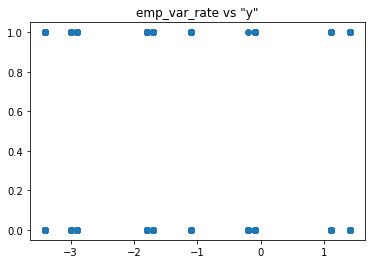

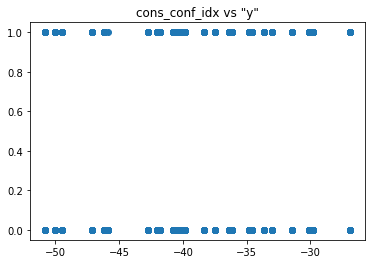

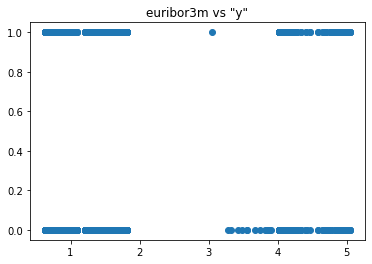

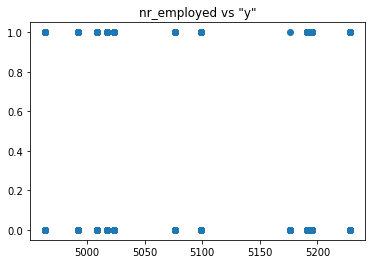

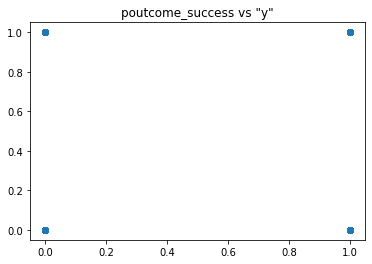

In [83]:
value_features = observe(df_value_features, graph=True)

   age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0    1       210         1  999.0         0           1.4          93.444   
1    2       138         1  999.0         0          -0.1          93.200   
2    0       339         3    6.0         2          -1.7          94.055   
3    1       185         2  999.0         0          -1.8          93.075   
4    2       137         1    3.0         1          -2.9          92.201   

   cons_conf_idx  euribor3m  nr_employed  ...  month_may  month_nov  \
0          -36.1      4.963       5228.1  ...          0          0   
1          -42.0      4.021       5195.8  ...          0          1   
2          -39.8      0.729       4991.6  ...          0          0   
3          -47.1      1.405       5099.1  ...          0          0   
4          -31.4      0.869       5076.2  ...          0          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0         

0.8311158589880547

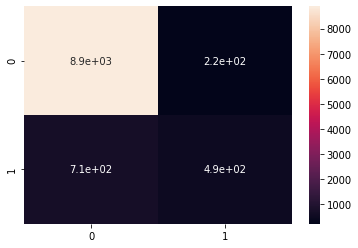

In [84]:
observe(df_dummies)

In [85]:
print("Best Feature/Accuracy w/ dummies vs Accuracy without")
print(f"{round(value_features,4)} / {round(log_acc,4)} / {round(class_score,4)}")

Best Feature/Accuracy w/ dummies vs Accuracy without
0.832 / 0.9125 / 0.9082
